<a href="https://colab.research.google.com/github/nithin-k-mundrathi/LLM-practice/blob/main/RAG/RAG_C_6/1_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the CSV file
file_path = '/content/Customer-Churn-Records.csv'
data1 = pd.read_csv(file_path)

# Drop columns and update the DataFrame in place
data1.drop(columns=['RowNumber','Surname', 'Gender','Geography'], inplace=True)
data1

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
data1.to_csv('data1.csv', index=False)
!cp /content/data1.csv /content/drive/MyDrive/data1.csv

## EDA

### Complain and exited

In [5]:
# Calculate sum of 'Exited' and 'Complain' where values are 1
sum_exited = (data1['Exited'] == 1).sum()
sum_complain = (data1['Complain'] == 1).sum()

# Calculate the percentage of complain over exited
if sum_exited > 0:  # To avoid division by zero
    percentage_complain_over_exited = (sum_complain/ sum_exited) * 100
else:
    percentage_complain_over_exited = 0

# Print results
print(f"Sum of Exited = {sum_exited}")
print(f"Sum of Complain = {sum_complain}")
print(f"Percentage of complain over exited = {percentage_complain_over_exited:.2f}%")

Sum of Exited = 2038
Sum of Complain = 2044
Percentage of complain over exited = 100.29%


### Age and exited

In [6]:
age=50

In [7]:

# Calculate the sum of customers aged 50 and over who have also exited
sum_age_and_over_among_exited = data1[(data1['Age'] >= age) & (data1['Exited'] == 1)].shape[0]

# Calculate the sum of customers who have exited
sum_exited = (data1['Exited'] == 1).sum()

# Calculate the percentage of customers aged 50 and over among those who have exited
if sum_exited > 0:  # To avoid division by zero
    percentage_age_and_over_among_exited = (sum_age_and_over_among_exited / sum_exited) * 100
else:
    percentage_age_and_over_among_exited = 0

# Print results
print(f"Sum of Age {age} and Over among Exited = {sum_age_and_over_among_exited}")
print(f"Sum of Exited = {sum_exited}")
print(f"Percentage of Age {age} and Over among Exited = {percentage_age_and_over_among_exited:.2f}%")

Sum of Age 50 and Over among Exited = 634
Sum of Exited = 2038
Percentage of Age 50 and Over among Exited = 31.11%


### Salary and exited

In [8]:
salary_threshold=100000

In [9]:
# Calculate the sum of customers with an estimated salary over the specified threshold who have also exited
sum_salary_over_among_exited = data1[(data1['EstimatedSalary'] >= salary_threshold) & (data1['Exited'] == 1)].shape[0]

# Calculate the sum of customers who have exited
sum_exited = (data1['Exited'] == 1).sum()

# Calculate the percentage of customers with a salary over the threshold among those who have exited
if sum_exited > 0:  # To avoid division by zero
    percentage_salary_over_among_exited = (sum_salary_over_among_exited / sum_exited) * 100
else:
    percentage_salary_over_among_exited = 0

# Print results
print(f"Sum of Estimated Salary over {salary_threshold} among Exited = {sum_salary_over_among_exited}")
print(f"Sum of Exited = {sum_exited}")
print(f"Percentage of Estimated Salary over {salary_threshold} among Exited = {percentage_salary_over_among_exited:.2f}%")


Sum of Estimated Salary over 100000 among Exited = 1045
Sum of Exited = 2038
Percentage of Estimated Salary over 100000 among Exited = 51.28%


### Heatmap

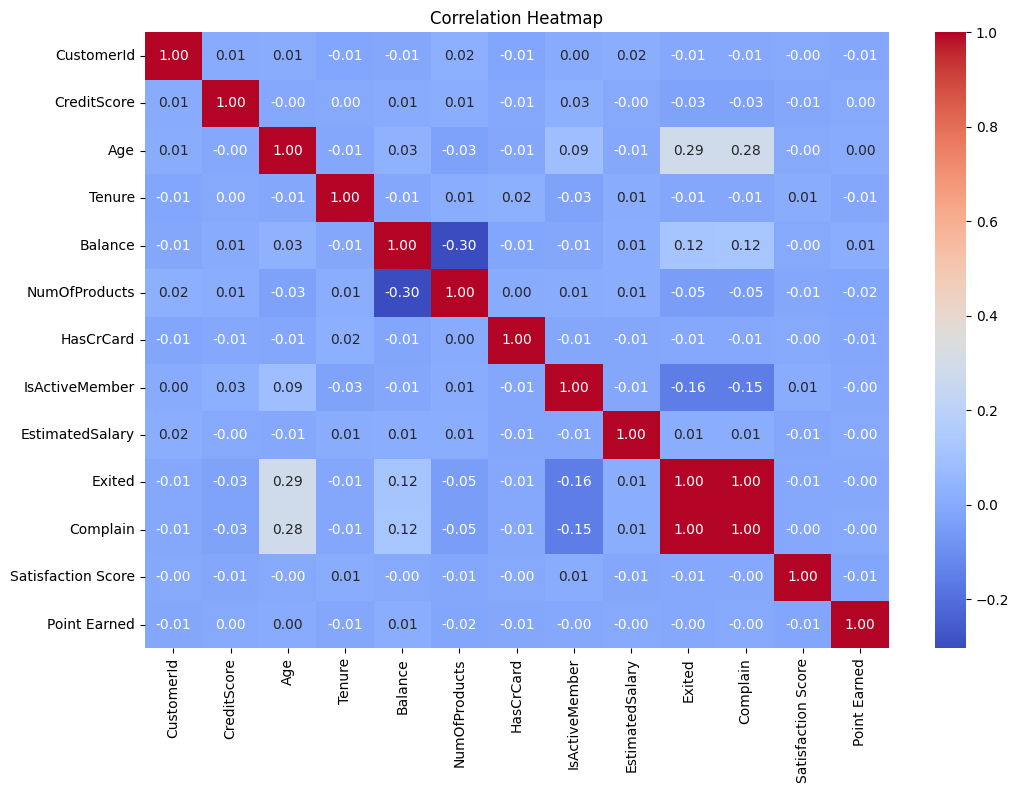

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numerical columns for the correlation heatmap
numerical_columns = data1.select_dtypes(include=['float64', 'int64']).columns
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data1[numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 3.Training a Machine Learning Model

In [11]:
# Copying data1 to data2
data2 = data1.copy()

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming you have a dataframe named data1 loaded as described
# Selecting relevant features
features = data2[['CreditScore', 'Age', 'EstimatedSalary', 'Exited', 'Complain', 'Point Earned']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Alternative scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Experiment with different numbers of clusters
for n_clusters in range(2, 5):  # Example range from 2 to 5
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    db_index = davies_bouldin_score(features_scaled, cluster_labels)
    print(f'For n_clusters={n_clusters}, the silhouette score is {silhouette_avg:.4f} and the Davies-Bouldin Index is {db_index:.4f}')


For n_clusters=2, the silhouette score is 0.6129 and the Davies-Bouldin Index is 0.6144
For n_clusters=3, the silhouette score is 0.3391 and the Davies-Bouldin Index is 1.1511
For n_clusters=4, the silhouette score is 0.3243 and the Davies-Bouldin Index is 1.0801


In [14]:

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)  # Explicitly setting n_init to 10
data2['class'] = kmeans.fit_predict(features_scaled)

In [15]:
data2

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,class
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,1


In [16]:
# 1. Sum where 'class' == 0
sum_class_0 = (data2['class'] == 0).sum()
# 2. Sum where 'class' == 0 and 'Complain' == 1
sum_class_0_complain_1 = data2[(data2['class'] == 0) & (data2['Complain'] == 1)].shape[0]
# 3. Sum where 'class' == 0 and 'Exited' == 1
sum_class_0_exited_1 = data2[(data2['class'] == 0) & (data2['Exited'] == 1)].shape[0]

# Print the results
print(f"Sum of 'class' == 0: {sum_class_0}")
print(f"Sum of 'class' == 0 and 'Complain' == 1: {sum_class_0_complain_1}")
print(f"Sum of 'class' == 0 and 'Exited' == 1: {sum_class_0_exited_1}")

Sum of 'class' == 0: 7961
Sum of 'class' == 0 and 'Complain' == 1: 8
Sum of 'class' == 0 and 'Exited' == 1: 1


In [17]:
# 1. Sum where 'class' == 1
sum_class_1 = (data2['class'] == 1).sum()

# 2. Sum where 'class' == 1 and 'Complain' == 1
sum_class_1_complain_1 = data2[(data2['class'] == 1) & (data2['Complain'] == 1)].shape[0]

# 3. Sum where 'class' == 1 and 'Exited' == 1
sum_class_1_exited_1 = data2[(data2['class'] == 1) & (data2['Exited'] == 1)].shape[0]

# Print the results
print(f"Sum of 'class' == 1: {sum_class_1}")
print(f"Sum of 'class' == 1 and 'Complain' == 1: {sum_class_1_complain_1}")
print(f"Sum of 'class' == 1 and 'Exited' == 1: {sum_class_1_exited_1}")

Sum of 'class' == 1: 2039
Sum of 'class' == 1 and 'Complain' == 1: 2036
Sum of 'class' == 1 and 'Exited' == 1: 2037
